**Source**  
[UCI source](http://archive.ics.uci.edu/ml/datasets/Individual+household+electric+power+consumption)  
[Data folder](http://archive.ics.uci.edu/ml/machine-learning-databases/00235/)

Georges Hebrail (georges.hebrail '@' edf.fr), Senior Researcher, EDF R&D, Clamart, France
Alice Berard, TELECOM ParisTech Master of Engineering Internship at EDF R&D, Clamart, France

**Data Set Information**  

This archive contains **2075259** measurements gathered in a house located in Sceaux (7 km of Paris, France) between **December 2006** and **November 2010** (**47 months**).  

**Notes:**  
  1. The expression **(1000/60)*GlobalActivePower - S1 - S2 - S3**  
  represents the active energy consumed every minute (in watt hour) in the household by electrical equipment not measured in sub-meterings 1, 2 and 3.
  2. The dataset contains some missing values in the measurements (nearly **1.25% of the rows**).  
  All calendar timestamps are present in the dataset but for some timestamps, the measurement values are missing:  
  a missing value is represented by the absence of value between two consecutive semi-colon attribute separators. For instance, the dataset shows missing values on April 28, 2007.

**Attribute Information**

  1. **date**: Date in format **dd/mm/yyyy**
  2. **time**: time in format **hh:mm:ss**
  3. **GlobalActivePower**: household global minute-averaged active power (in **kilowatt**)
  4. **GlobalReactivePower**: household global minute-averaged reactive power (in **kilowatt**)
  5. **Voltage**: minute-averaged voltage (in **volt**)
  6. **GlobalIntensity**: household global minute-averaged current intensity (in **ampere**)
  7. **S1**: energy sub-metering No. 1 (in **watt-hour** of active energy).  
  It corresponds to the kitchen, containing mainly a dishwasher, an oven and a microwave (hot plates are not electric but gas powered).
  8.  **S2**: energy sub-metering No. 2 (in **watt-hour** of active energy).  
  It corresponds to the laundry room, containing a washing-machine, a tumble-drier, a refrigerator and a light.
  9.  **S3**: energy sub-metering No. 3 (in **watt-hour** of active energy).  
  It corresponds to an electric water-heater and an air-conditioner.
 
**Relevant Papers**

N/A


**Citation Request**

This dataset is made available under the “Creative Commons Attribution 4.0 International (CC BY 4.0)” license
  

### General setup

Submetering 1: $S_1$ $[Wh]$, corresponds to the kitchen, containing mainly a dishwasher, an oven and a microwave.  
Submetering 2: $S_2$ $[Wh]$, corresponds to the laundry room, containing a washing-machine, a tumble-drier, a refrigerator and a light.  
Submetering 3: $S_3$ $[Wh]$, corresponds to an electric water-heater and an air-conditioner.  
Global active power: $P_{active}$ $[kW]$, household global minute-averaged active power.  
  
Active energy consumed: $E_{active}$ $[Wh]$ corresponds to the active energy consumed every minute by electrical equipment not measured in $S_1$, $S_2$ and $S_3$ and is described by:  

$$E_{active} = S_4 = \frac{1000}{60}P_{active} - (S_1 + S_2 + S_3)$$

## Analysis approaches
  * Logger system
  * Summary statistics

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from householddata import load_and_preprocess_data
from householddata import metadata_list
from householddata import daytimeframedata
from householddata import day_of_week_summary
from householddata import months_summary
from householddata import hour_of_day_summary
from householddata import attach_shifted_series

sns.set_style(style='whitegrid')

metadata = metadata_list()
dayofweek = metadata[4]
months = metadata[5]
hourofday = metadata[6]

In [3]:
powerdata = load_and_preprocess_data()
print(np.isnan(powerdata.S4).any())
powerdata.info()

/home/dreuter/Github/kaggle-paths/household-power/data/power-data.zip
already exists, file not downloaded
txt file already exists in
/home/dreuter/Github/kaggle-paths/household-power/data,
no files extracted
False
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 10 columns):
Date                   object
Time                   object
GlobalActivePower      float64
GlobalReactivePower    float64
Voltage                float64
GlobalIntensity        float64
S1                     float64
S2                     float64
S3                     float64
S4                     float64
dtypes: float64(8), object(2)
memory usage: 174.2+ MB


Days processed: 365


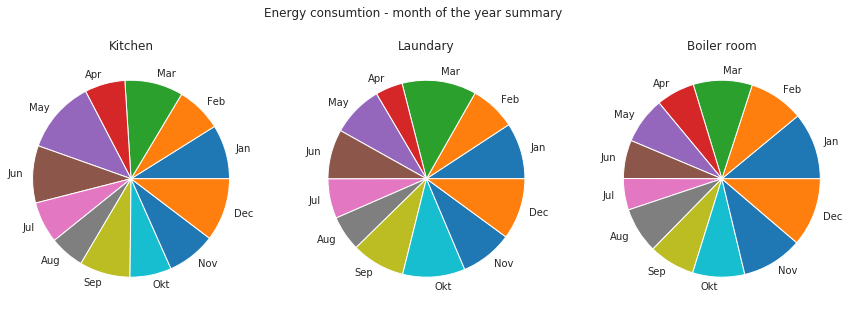

In [3]:
yearsfromstart = 1
roomsummary = months_summary(powerdata,yearsfromstart)

fig, axes = plt.subplots(1,3, figsize=(15,5))
fig.suptitle('Energy consumtion - month of the year summary')
axes[0].pie(x=roomsummary[0], labels=months)
axes[0].set_title('Kitchen')
axes[1].pie(x=roomsummary[1], labels=months)
axes[1].set_title('Laundary')
axes[2].pie(x=roomsummary[2], labels=months)
axes[2].set_title('Boiler room')
plt.show()

Days processed: 364


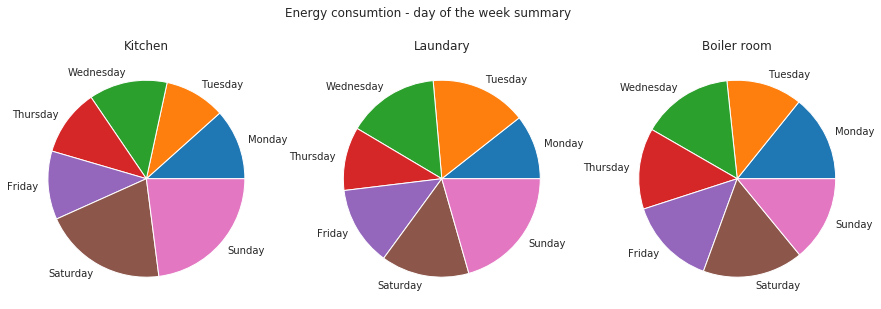

In [11]:
# Day of the week summry
weeksfromstart = 52
roomsummary = day_of_week_summary(powerdata,weeksfromstart)

fig, axes = plt.subplots(1,3, figsize=(15,5))
fig.suptitle('Energy consumtion - day of the week summary')
axes[0].pie(x=roomsummary[0], labels=dayofweek)
axes[0].set_title('Kitchen')
axes[1].pie(x=roomsummary[1], labels=dayofweek)
axes[1].set_title('Laundary')
axes[2].pie(x=roomsummary[2], labels=dayofweek)
axes[2].set_title('Boiler room')
plt.show()

Days processed: 10


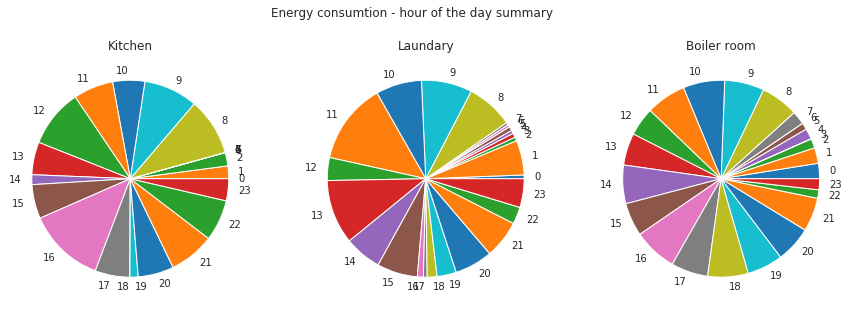

In [13]:
daysfromstart = 10
roomsummary = hour_of_day_summary(powerdata,daysfromstart)
hourofday = [str(x) for x in range(24)]

fig, axes = plt.subplots(1,3, figsize=(15,5))
fig.suptitle('Energy consumtion - hour of the day summary')
axes[0].pie(x=roomsummary[0], labels=hourofday)
axes[0].set_title('Kitchen')
axes[1].pie(x=roomsummary[1], labels=hourofday)
axes[1].set_title('Laundary')
axes[2].pie(x=roomsummary[2], labels=hourofday)
axes[2].set_title('Boiler room')
plt.show()

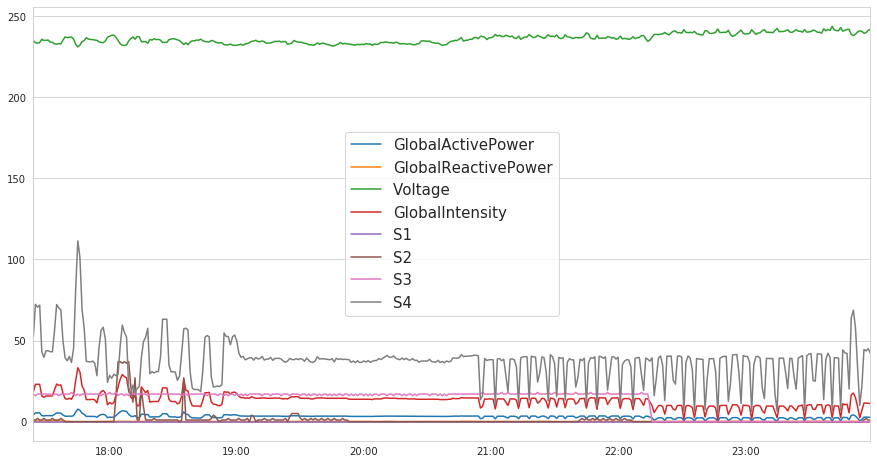

In [9]:
powerdata['2006-12-16'].plot(figsize = (15,8))
plt.legend(fontsize=15)
plt.show()

In [140]:
powerdata.head()

,Date,Time,GlobalActivePower,GlobalReactivePower,Voltage,GlobalIntensity,S1,S2,S3,S4
2006-12-16 17:24:00,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,52.266667
2006-12-16 17:25:00,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,72.333333
2006-12-16 17:26:00,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,70.566667
2006-12-16 17:27:00,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,71.800000
2006-12-16 17:28:00,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,43.100000


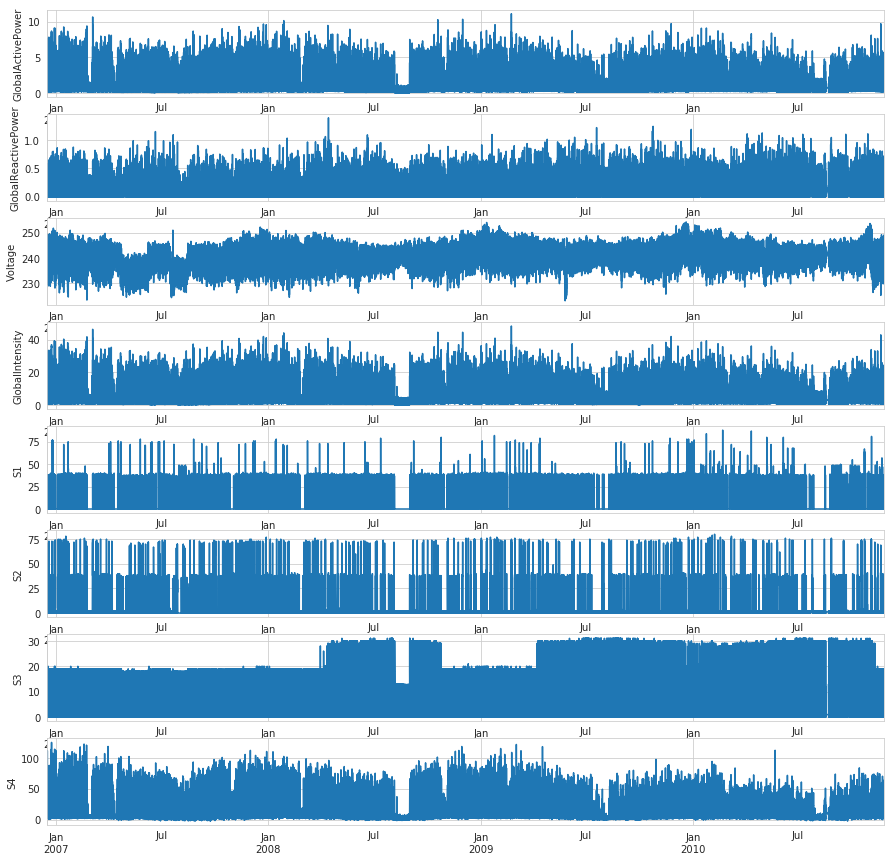

In [4]:
fig, axes = plt.subplots(8,1,figsize=(15,15))
for i in range(8):
    powerdata.iloc[:,i+2].plot(ax=axes[i])
    axes[i].set_ylabel(powerdata.columns[i+2])
plt.show()

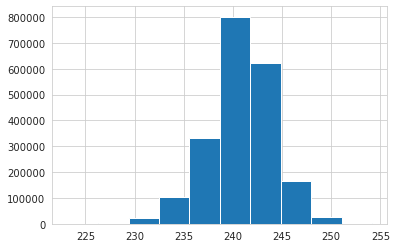

True

In [8]:
plt.hist(powerdata.Voltage.interpolate())
plt.show()
np.isnan(powerdata.S3).any()

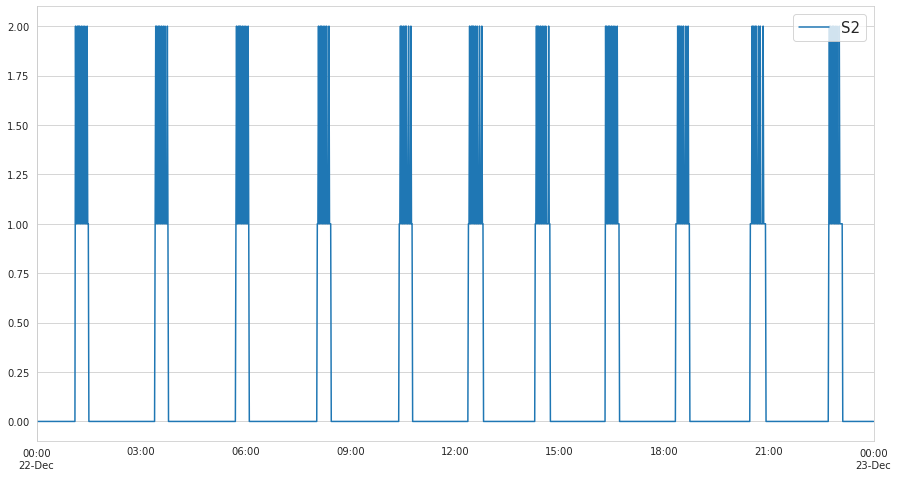

Friday
Total energy consumed in kitchen [kWh]
S2    0.35
dtype: float64


In [11]:
day_of_interest = 5
cols = ["S2"]
timeframedata, timefrom = daytimeframedata(powerdata,cols,day_of_interest)

timeframedata.plot(figsize = (15,8))
plt.legend(fontsize=15)
plt.show()
print(dayofweek[timefrom.dayofweek])
print("Total energy consumed in kitchen [kWh]")
print(np.sum(timeframedata)/1000)

In [6]:
# Data handling stuff
import sys 
import numpy as np
from scipy.stats import randint
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn import metrics
from sklearn.metrics import mean_squared_error,r2_score

## Deep-learing stuff
import keras
import itertools
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical
from keras.optimizers import SGD 
from keras.callbacks import EarlyStopping
from keras.utils import np_utils

from keras.layers import LSTM
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import Dropout

Using TensorFlow backend.


In [7]:
powerdata.isnull().sum()

Date                       0
Time                       0
GlobalActivePower          0
GlobalReactivePower        0
Voltage                    0
GlobalIntensity            0
S1                     25979
S2                     25979
S3                     25979
S4                         0
dtype: int64

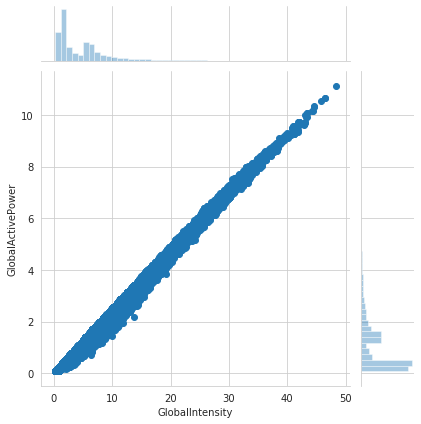

In [21]:
sns.jointplot(x='GlobalIntensity', y='GlobalActivePower', data=powerdata)  
plt.show()

In [22]:
powerdata.describe()

,GlobalActivePower,GlobalReactivePower,Voltage,GlobalIntensity,S1,S2,S3,S4
count,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.075259e+06
mean,1.090280e+00,1.236492e-01,2.408328e+02,4.621481e+00,1.121923e+00,1.298520e+00,6.458447e+00,9.330226e+00
std,1.052628e+00,1.124194e-01,3.237763e+00,4.424361e+00,6.153031e+00,5.822026e+00,8.437154e+00,9.546528e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-2.400000e+00
25%,3.100000e-01,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.833333e+00
50%,6.140000e-01,1.000000e-01,2.410000e+02,2.751585e+00,0.000000e+00,0.000000e+00,1.000000e+00,5.533333e+00
75%,1.528000e+00,1.940000e-01,2.428700e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01,1.046667e+01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01,1.248333e+02


In [25]:
# Monthly summation
powerdata['GlobalActivePower'].resample('M').sum()

2006-12-31    41826.806
2007-01-31    69017.296
2007-02-28    56496.828
2007-03-31    58862.721
2007-04-30    36529.192
2007-05-31    44008.872
2007-06-30    35734.131
2007-07-31    29834.878
2007-08-31    34120.595
2007-09-30    41881.842
2007-10-31    49281.414
2007-11-30    55922.096
2007-12-31    72605.600
2008-01-31    65173.831
2008-02-29    49338.049
2008-03-31    55592.196
2008-04-30    48209.992
2008-05-31    45724.874
2008-06-30    42944.690
2008-07-31    35478.298
2008-08-31    12344.277
2008-09-30    42667.792
2008-10-31    50771.237
2008-11-30    59937.015
2008-12-31    56969.482
2009-01-31    62955.305
2009-02-28    50277.602
2009-03-31    54767.274
2009-04-30    49276.744
2009-05-31    45212.469
2009-06-30    37676.535
2009-07-31    27596.052
2009-08-31    29292.917
2009-09-30    42633.622
2009-10-31    51089.307
2009-11-30    55070.367
2009-12-31    60909.884
2010-01-31    64880.192
2010-02-28    55476.990
2010-03-31    49785.606
2010-04-30    44378.495
2010-05-31    48

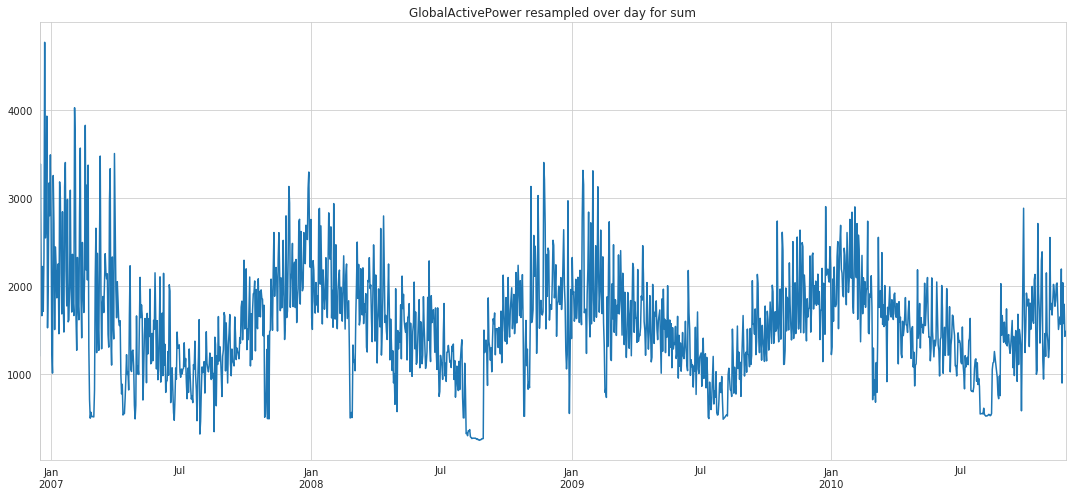

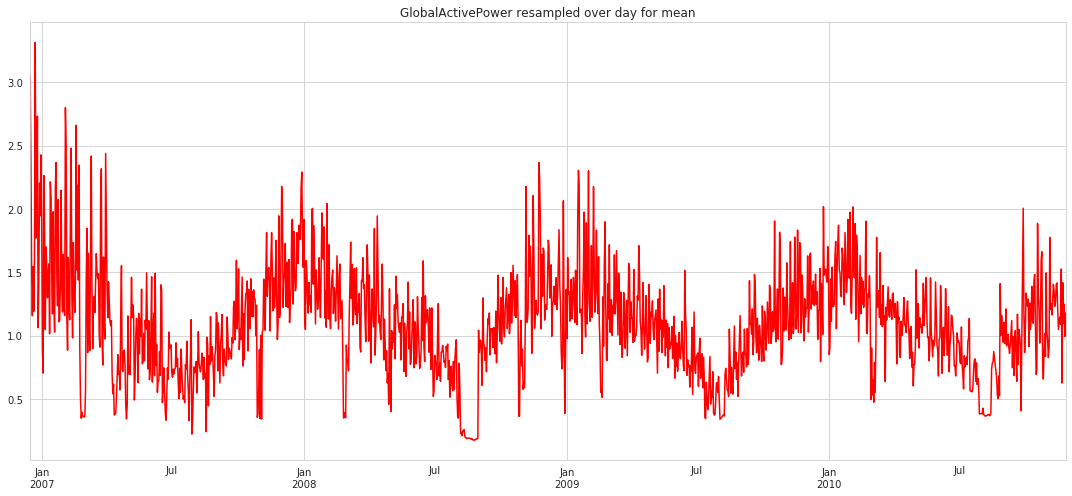

In [51]:
plt.figure(figsize=(15,7))
powerdata.GlobalActivePower.resample('D').sum().plot(title='GlobalActivePower resampled over day for sum') 
plt.tight_layout()
plt.show()

plt.figure(figsize=(15,7))
powerdata.GlobalActivePower.resample('D').mean().plot(title='GlobalActivePower resampled over day for mean', color='red') 
plt.tight_layout()
plt.show()

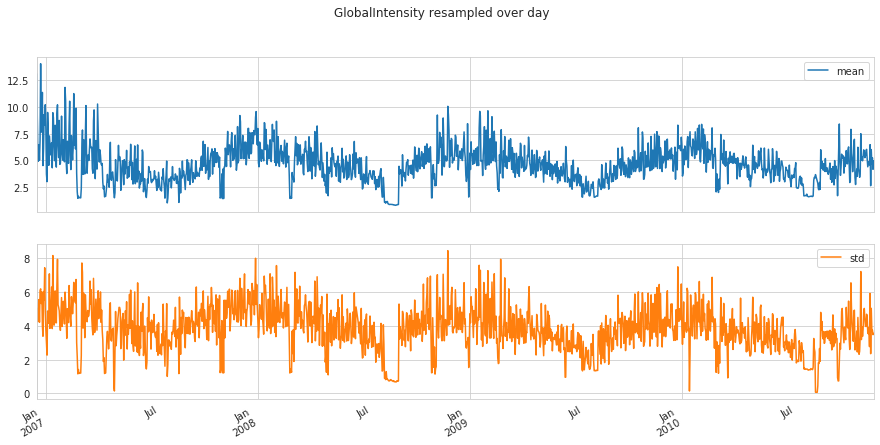

In [50]:
r = powerdata.GlobalIntensity.resample('D').agg(['mean', 'std'])
r.plot(subplots = True, title='GlobalIntensity resampled over day', figsize=(15,7))
plt.show()

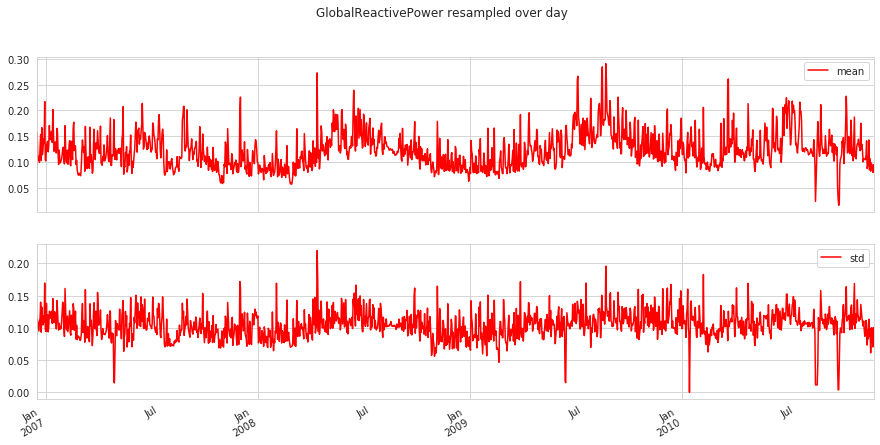

In [49]:
r2 = powerdata.GlobalReactivePower.resample('D').agg(['mean', 'std'])
r2.plot(subplots=True, title='GlobalReactivePower resampled over day', color='red', figsize=(15,7))
plt.show()

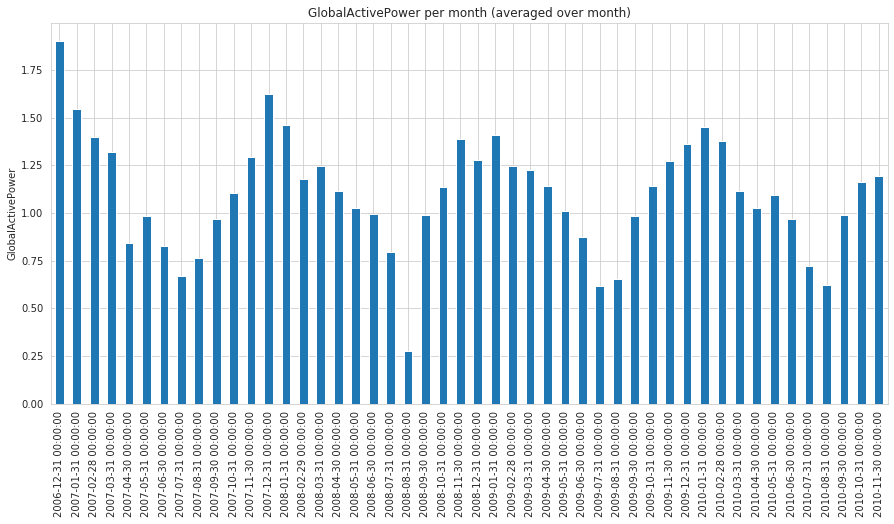

In [59]:
# Sum of 'GlobalActivePower' resampled over month
plt.figure(figsize=(15,7))
powerdata['GlobalActivePower'].resample('M').mean().plot(kind='bar')
plt.xticks(rotation=90)
plt.ylabel('GlobalActivePower')
plt.title('GlobalActivePower per month (averaged over month)')
plt.show()

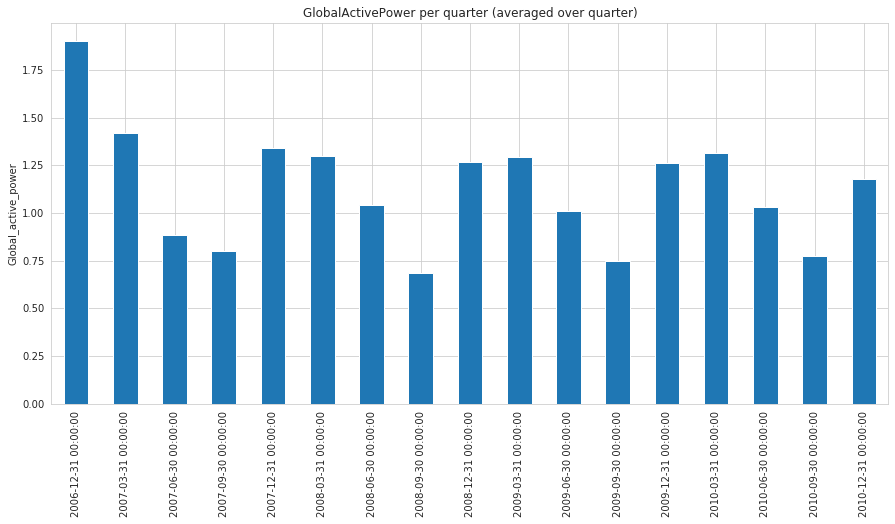

In [58]:
plt.figure(figsize=(15,7))
powerdata['GlobalActivePower'].resample('Q').mean().plot(kind='bar')
plt.xticks(rotation=90)
plt.ylabel('Global_active_power')
plt.title('GlobalActivePower per quarter (averaged over quarter)')
plt.show()

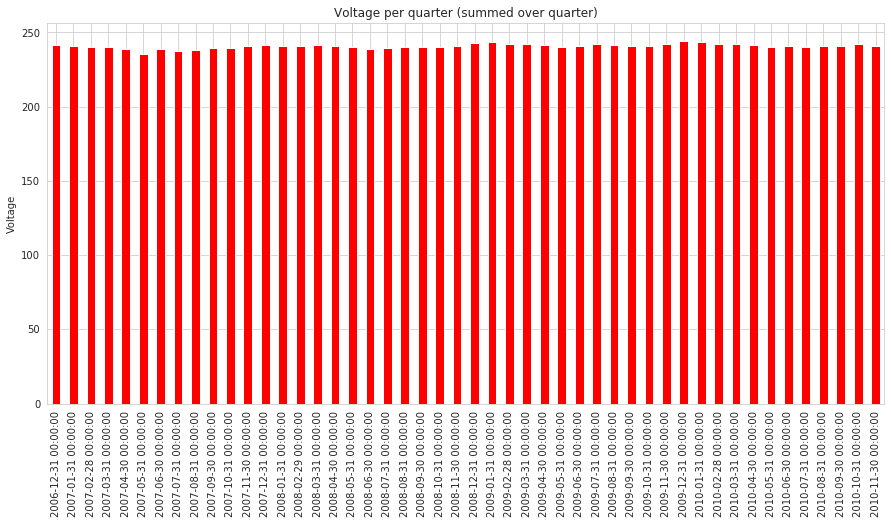

In [57]:
plt.figure(figsize=(15,7))
powerdata['Voltage'].resample('M').mean().plot(kind='bar', color='red')
plt.xticks(rotation=90)
plt.ylabel('Voltage')
plt.title('Voltage per quarter (summed over quarter)')
plt.show()

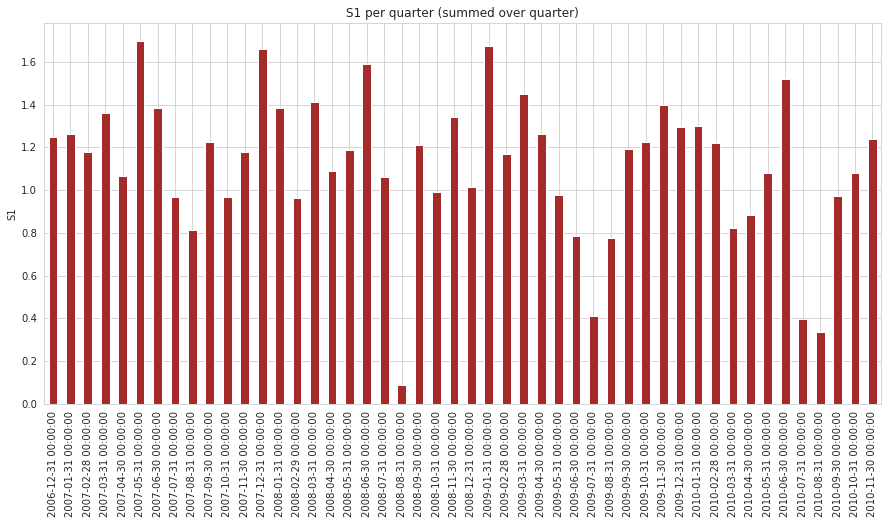

In [60]:
plt.figure(figsize=(15,7))
powerdata['S1'].resample('M').mean().plot(kind='bar', color='brown')
plt.xticks(rotation=90)
plt.ylabel('S1')
plt.title('S1 per quarter (summed over quarter)')
plt.show()

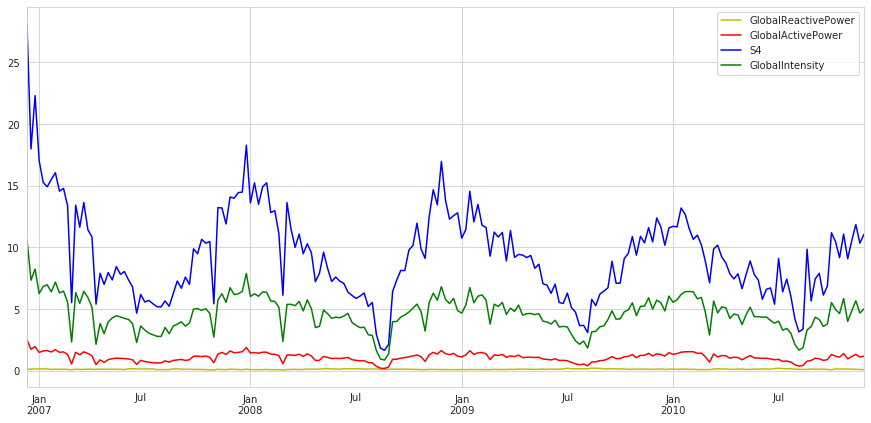

In [64]:
## Resampling over week and computing mean
plt.figure(figsize=(15,7))
powerdata.GlobalReactivePower.resample('W').mean().plot(color='y', legend=True)
powerdata.GlobalActivePower.resample('W').mean().plot(color='r', legend=True)
powerdata.S4.resample('W').mean().plot(color='b', legend=True)
powerdata.GlobalIntensity.resample('W').mean().plot(color='g', legend=True)
plt.show()

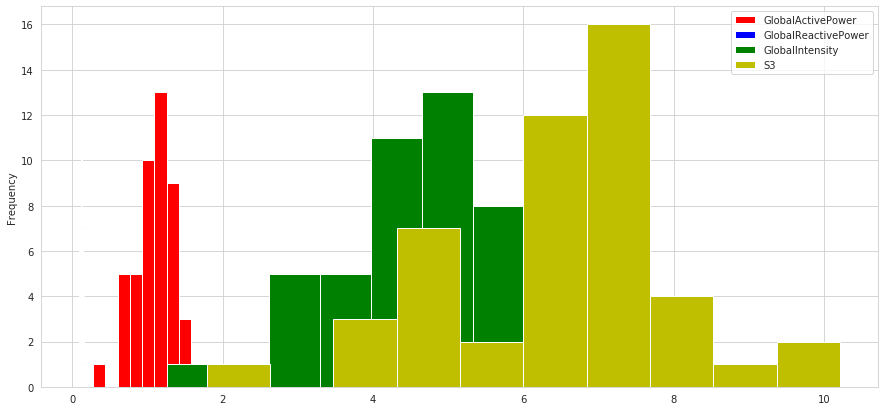

In [73]:
# Monthly means histogram of different feature
plt.figure(figsize=(15,7))
powerdata.GlobalActivePower.resample('M').mean().plot(kind='hist', color='r', legend=True )
powerdata.GlobalReactivePower.resample('M').mean().plot(kind='hist',color='b', legend=True)
#powerdata.Voltage.resample('M').sum().plot(kind='hist',color='g', legend=True)
powerdata.GlobalIntensity.resample('M').mean().plot(kind='hist', color='g', legend=True)
powerdata.S3.resample('M').mean().plot(kind='hist', color='y', legend=True)
plt.show()

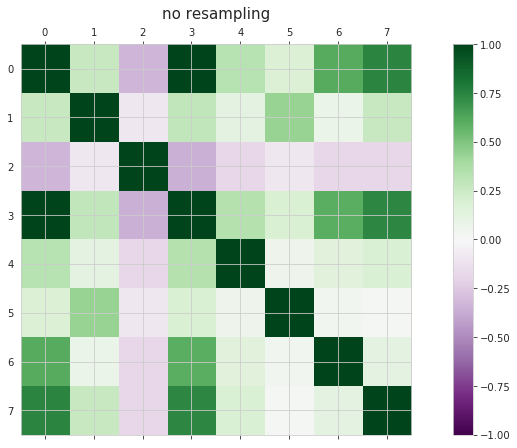

In [260]:
# Column correlation
plt.figure(figsize=(15,7))
plt.matshow(powerdata.corr(method='spearman'),vmax=1,vmin=-1,cmap='PRGn', fignum=1)
plt.title('no resampling', size=15)
plt.colorbar()
plt.show()

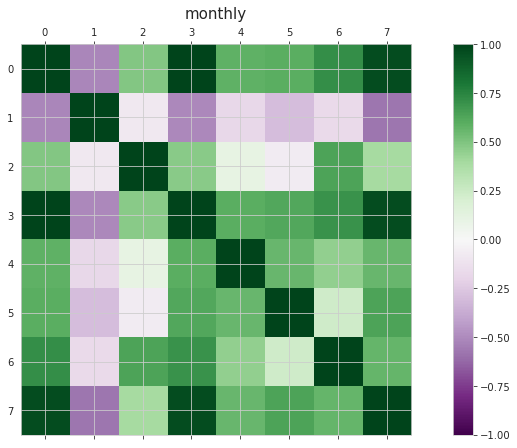

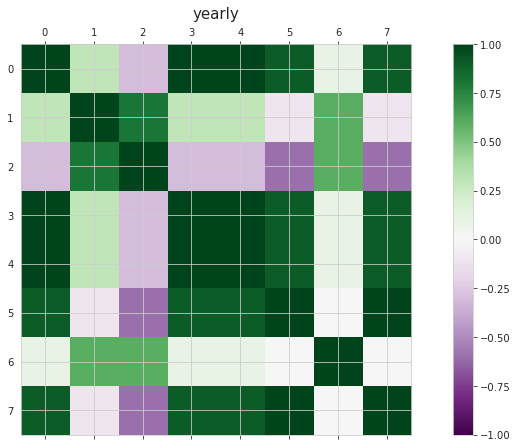

In [259]:
plt.figure(figsize=(15,7))
plt.matshow(powerdata.resample('M').mean().corr(method='spearman'),vmax=1,vmin=-1,cmap='PRGn', fignum=1)
plt.title('monthly', size=15)
plt.colorbar()
plt.margins(0.02)
plt.show()

plt.figure(figsize=(15,7))
plt.matshow(powerdata.resample('A').mean().corr(method='spearman'),vmax=1,vmin=-1,cmap='PRGn', fignum=1)
plt.title('yearly', size=15)
plt.colorbar()
plt.show()

## ML Test

In [ ]:
# Data handling stuff
import sys 
import numpy as np
from scipy.stats import randint
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn import metrics
from sklearn.metrics import mean_squared_error,r2_score

## Deep-learing stuff
import keras
import itertools
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical
from keras.optimizers import SGD 
from keras.callbacks import EarlyStopping
from keras.utils import np_utils

from keras.layers import LSTM
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import Dropout

In [33]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense

In [13]:
powerdata_hourly = powerdata.resample('h').mean() 
powerdata_hourly.shape

(34589, 8)

In [21]:
# Inserting 8 1-hour lagged input variables and 1 output variable 
# for 'GlobalActivePower' at the current time in hour

values = powerdata_hourly.values 

scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

preprocessed = attach_shifted_series(scaled, 1, 1)
print(preprocessed.shape)

# drop non lagged predictor variables and keep target variable as last column
dropcols = [x for x in range(9,16)]
preprocessed.drop(preprocessed.columns[dropcols], axis=1, inplace=True)
preprocessed.head()

(34588, 16)


,col1[t-1],col2[t-1],col3[t-1],col4[t-1],col5[t-1],col6[t-1],col7[t-1],col8[t-1],target1[t]
1,0.636816,0.295738,0.337945,0.631157,0.0,0.011366,0.687521,0.813346,0.545045
2,0.545045,0.103358,0.335501,0.541487,0.0,0.144652,0.687748,0.560591,0.509006
3,0.509006,0.110073,0.283802,0.502152,0.0,0.030869,0.680272,0.585814,0.488550
4,0.488550,0.096987,0.315987,0.481110,0.0,0.000000,0.684350,0.572244,0.455597
5,0.455597,0.099010,0.434417,0.449904,0.0,0.008973,0.702019,0.503143,0.322555


In [37]:
values = preprocessed.values

n_train_time = 365*24 # Hours for one year of data
train = values[:n_train_time, :]
test = values[n_train_time:, :]

train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]

# Reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape) 

(8760, 1, 8) (8760,) (25828, 1, 8) (25828,)


### Model architecture
  1. LSTM with 100 neurons in the first visible layer
  2. Dropout **20%**
  3. **1 neuron** in the output layer for predicting **GlobalActivePower**.
  4. The input shape will be **1 time step** with **8 features**.
  5. Mean Absolute Error (MAE) is used as loss function and the efficient Adam version of stochastic          gradient descent.
  6. The model will be fit for **20 training epochs** with a batch size of **70**.

In [38]:
model = Sequential()
model.add(LSTM(100, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

yfit = model.fit(train_X, 
                 train_y, 
                 epochs=20, 
                 batch_size=70, 
                 validation_data=(test_X, test_y), 
                 verbose=2, 
                 shuffle=False)

Train on 8760 samples, validate on 25828 samples
Epoch 1/20
 - 2s - loss: 0.0209 - val_loss: 0.0111
Epoch 2/20
 - 1s - loss: 0.0115 - val_loss: 0.0093
Epoch 3/20
 - 1s - loss: 0.0108 - val_loss: 0.0089
Epoch 4/20
 - 1s - loss: 0.0106 - val_loss: 0.0089
Epoch 5/20
 - 1s - loss: 0.0106 - val_loss: 0.0088
Epoch 6/20
 - 1s - loss: 0.0105 - val_loss: 0.0089
Epoch 7/20
 - 1s - loss: 0.0105 - val_loss: 0.0090
Epoch 8/20
 - 1s - loss: 0.0104 - val_loss: 0.0090
Epoch 9/20
 - 1s - loss: 0.0104 - val_loss: 0.0090
Epoch 10/20
 - 1s - loss: 0.0104 - val_loss: 0.0090
Epoch 11/20
 - 1s - loss: 0.0104 - val_loss: 0.0090
Epoch 12/20
 - 1s - loss: 0.0104 - val_loss: 0.0091
Epoch 13/20
 - 1s - loss: 0.0104 - val_loss: 0.0090
Epoch 14/20
 - 1s - loss: 0.0104 - val_loss: 0.0090
Epoch 15/20
 - 1s - loss: 0.0104 - val_loss: 0.0090
Epoch 16/20
 - 1s - loss: 0.0104 - val_loss: 0.0091
Epoch 17/20
 - 1s - loss: 0.0104 - val_loss: 0.0090
Epoch 18/20
 - 1s - loss: 0.0104 - val_loss: 0.0090
Epoch 19/20
 - 1s - loss

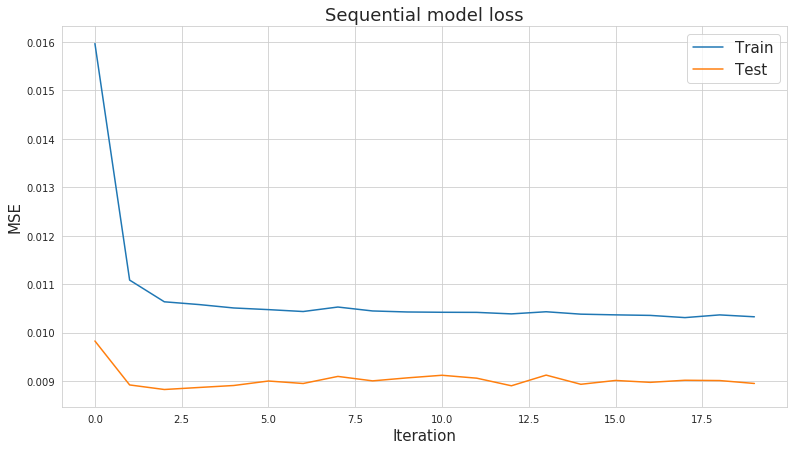

In [30]:
# plotting loss history
plt.figure(figsize=(13,7))
plt.plot(yfit.history['loss'])
plt.plot(yfit.history['val_loss'])
plt.title('Sequential model loss', fontsize=18)
plt.ylabel('MSE', fontsize=15)
plt.xlabel('Iteration', fontsize=15)
plt.legend(['Train', 'Test'], loc='upper right', fontsize=15)
plt.show()

### Make predictions

In [31]:
yhat = model.predict(test_X)
X_test = test_X.reshape((test_X.shape[0], 8))
X_test.shape

(25828, 8)

In [34]:
# Inverting prediction scaling to original units
inv_yhat = np.concatenate((yhat, X_test[:, -7:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]

# Invert scaling for actual data
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y, X_test[:, -7:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]

# Calculating RMSE
rmse = np.sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 0.609


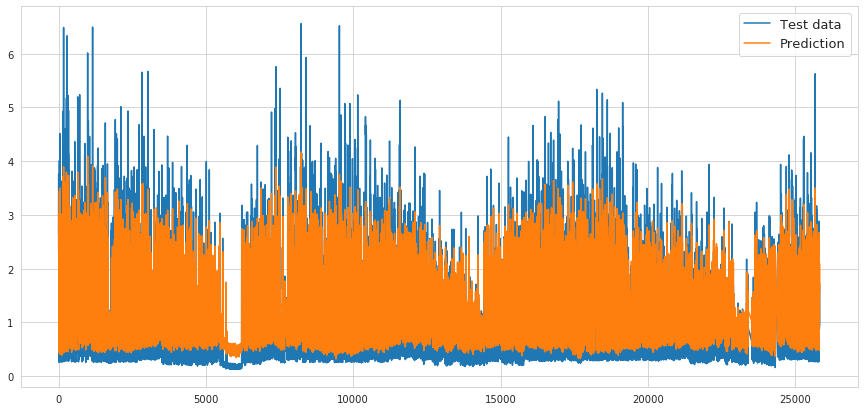

In [36]:
plt.figure(figsize=(15,7))
x = np.arange(len(inv_y))
plt.plot(x,inv_y, label="Test data")
plt.plot(x,inv_yhat, label="Prediction")
plt.legend(fontsize=13)
plt.show()

## Final remarks
  * LSTM was used which is the state-of-the-art for sequencial- or time-series problems.
  * In order to reduce the computation time, only the first year of data (aggregated over hours) was used to train the model and the rest of the 4 years data to test the model.
  * This simple LSTM neural-network is ment to show that it is possible to obtain reasonable predictions. However numbers of rows is high and as a result the computation is somewhat time consuming. The Best is to write the last part of code using Spark (MLlib) running on GPU.
  * Moreover, the neural-network architecture that I have designed is a toy model. It can be easily improved by dropout and adding CNN layers. The CNN is useful here since there are correlations in data (CNN layer is a good way to probe the local structure of data).